# 파이썬 머신러닝 실습

교재 : 파이썬머신러닝 완벽 가이드

86P 시작

[참고: sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


## 전체 순서

1. 데이터 불러오기 / 분류
  - 데이터를 불러온 후 train 데이터와 test 데이터로 분류한다.


2. 모형 학습 코드(모형 불러오기)
  - train 데이터를 기반으로 Machine Learning 알고리즘을 적용해 모델을 학습시킨다.


3. 모형 예측 수행
  - 학습된 ML 모델을 이용해 테스트 데이터의 분류 및 예측한다.


4. 모형 평가(실제값과 잘 맞냐, 안맞냐)
  - 예측된 결과값과 테스트 데이터의 실제 결과를 비교, 성능 평가

## 분류 모형

- 결과가 택 1인 것
  - ex.
  - 태아의 성별 예측
  - 은행 대축 허락여부
  - 코로나 음성양성 진단 등

# 실습 01

### 머신러닝 데이터 불러오기

In [28]:
# 예제 데이터
from sklearn.datasets import load_iris

# 머신러닝 알고리즘 중 결정트리
from sklearn.tree import DecisionTreeClassifier

# 훈련 데이터 / 테스트 데이터 분류
from sklearn.model_selection import train_test_split

import pandas as pd

iris = load_iris()  # 객체선언
iris_data = iris.data  # 독립변수

# 라벨 가져오기
iris_label = iris.target  # 종속변수

# 확인
# print("iris target", iris_label)
# print("irisdata", iris_data)
# print("iris target 명", iris.target_names)

# DF 만들기
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
print("iris target 명", iris.target_names)

iris target 명 ['setosa' 'versicolor' 'virginica']


- iris target 명
  - 0: 'setosa'
  - 1: 'versicolor'
  - 2: 'virginica'

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data  # 독립변수
    , iris_label  # 종속변수
    , test_size = 0.2
    , random_state = 2023
)

#습관할거 - 분리 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 모형 학습 코드

1. 객체 선언
2. fit = 학습

In [31]:
# 객체생성, 선언
dt_clf = DecisionTreeClassifier(random_state=11)

# 머신러닝 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

### 모형 예측

In [32]:
pred = dt_clf.predict(X_test)
pred

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

- iris target 명
  - 0: 'setosa'
  - 1: 'versicolor'
  - 2: 'virginica'

### 모형 평가

In [33]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))

1.0


- 평가 정도가 다른 이유

  - 랜덤 숫자가 다르기 때문

### ------ 끝!

# 실습 02

## 분류 VS 회귀

- 분류
  - 선택
  - 클래스
    - DecisionTreeClassifier
    - RandomForestClassifier

<br>

- 회귀
  - 수치 예측
  - 클래스
    - LinearRegression

# 교차검증(데이터가 적을 때 사용)
여러번 학습/예측/평가 => 모델의 정확도를 평균화 => 안정적 모델링

단, 여러번 시행하는 만큼 시간이 오래걸림

<br>

- K-폴드 교차검증
- 예시
  1. 10,000,000명의 모집단
  2. 1,000 명 분의 데이터 수집
  3. 예측 - 내일 우리제품 구매/안구매?
  4. 800명 훈련 데이터, 200명 테스트 데이터 분리
  5. 샘플링 이슈 존재함(샘플왜곡)
  6. 따라서 여러번 학습/예측/평가함
  7. 모델 정확도 평균화

### 데이터 불러오기

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 11)

print("붓꽃 데이터 세트 크기:", features.shape[0])

붓꽃 데이터 세트 크기: 150


### KFold 코드

In [35]:
kfold = KFold(n_splits=5) # 5개의 폴드 데이터 생성

cv_accuracy = []
n_iter = 0

# 반복문 - KFold 객체의 split() 호출하면 =>
# 폴드 별, 학습용, 검증용 테스트를 Row index 배열로 반환

for train_index, test_index in kfold.split(features):

  # print(train_index,test_index) #확인
  X_train, X_test = features[train_index], features[test_index] #독립변수
  y_train, y_test = label[train_index], label[test_index] #종속변수

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  n_iter += 1

  # 반복 할때마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

print("\n## 평균검증 정확도", np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.8333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균검증 정확도 0.9200000000000002


### Stratified KFold

- 층화추출에서 유래됨
  - 층화추출이란? \
  주제의 중립성을 위해 데이터를 선택적으로 추출하는 것

- 분류모델에서는 꼭 써야함
  - 이유 : 104P 하단
  
- 예시
  - 범주 예측
    - 100건 연체, 9900건 정상

  - 훈련데이터/테스트 데이터분리
    - 훈련데이터 = 99건 연체 / 6901건 정상
    - 테스트 = 1건 연체 / 나머지 정상
    - 비정상적인 분류

In [36]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [37]:
kfold = KFold(n_splits = 3) # 폴드세트 3회 반복

n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  # print(train_index, test_index)
  label_train = iris_df['label'].iloc[train_index]
  # print(label_train)
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


학습은 0, 1 인데 검증은 2 에서 나옴

=> 다 틀린거임

In [38]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

n_iter = 0

for train_index, test_index in skf.split(iris_df,iris_df['label']):
  n_iter += 1
  # print(train_index, test_index)
  label_train = iris_df['label'].iloc[train_index]
  # print(label_train)
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


순서는 다르지만 학습과 검증의 데이터 종류가 같다.

- 단어가 바뀜

  - 학습 => 훈련
    - 같은내용

  - 테스트 => 검증
    - 다른내용

### 모형 학습 및 예측 평가

108P

In [44]:
dt_clf =  DecisionTreeClassifier(random_state=11)
skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
  # print(train_index, test_index)
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred =dt_clf.predict(X_test)

  # 반복마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)

  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.92, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.92 0.98]
## 평균 검증 정확도: 0.96


### 두 검증 비교하기

- 평균 검증 정확도 비교

  - skfold = 평균 검증 정확도: 0.96
  - kfold = 평균검증 정확도 0.92

정확도가 올랐다!

---

- 교차 검증별 정확도

  - skfold의 편차 : 0.08
  - kfold 의 편차 : 0.17

skfold의 편차가 낮아서 안정적(신뢰도가 높음)

### 반복문 대체

- cross_val_score()

[참고](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

반복문은 너무 길다.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 11)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도, 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)

print(np.round(scores))

[1. 1. 1.]


# GridSearchCV

교차검증과 최적 하이퍼 파라미터 튜닝을 한번에

### HyperParameter ?

1.0


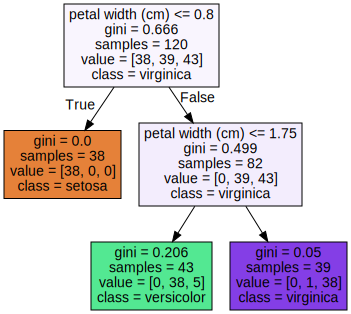

In [67]:
from sklearn.datasets import load_iris               # 예제 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier      # 결정트리 머신러닝 알고리즘 중 하나
from sklearn.model_selection import train_test_split # 훈련 데이터 / 테스트 데이터
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

iris = load_iris()
iris_data = iris.data  # 독립변수
iris_label = iris.target # 종속변수

# 0은 setosa, 1은 versicolor 2는 virginica 품종으로 구분
X_train, X_test, y_train, y_test = train_test_split(
    iris_data     # 독립변수
    , iris_label # 종속변수
    , test_size=0.2
    , random_state=2023
)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2, min_samples_split=3)

# 학습 수행
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names= iris.feature_names, impurity=True, filled=True)
pred = dt_clf.predict(X_test)

print(accuracy_score(y_test, pred))

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

max_depth 를 바꾸면 정확도가 바뀐다!!!

### 의사결정 트리의 구조
교재 = 190P

### max_depth를 조절 = HyperParameter 조절
    - 분기를 통해 클래스가 나뉜다.
    - 질문의 갯수 = max_depth

min_samples_split 도 파라메터



### 설명
```
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2, min_samples_split=3)

```
- max_depth=1, min_samples_split=2
    - => 정확도는 63.3

- max_depth=1, min_samples_split=3
    - => 정확도는 70

<br>

파라메터 종류 왕많음

=> 이걸 다 정리해서 만들 수 있음?


### 최고의 파라미터 조합을 찾으려면 어떻게 할까?

- GridSearchCV, RandomSearchCV
  - 교재 111p

In [ ]:
# (컴퓨터가)노가다로 찾는 방법
# 연산속도 왕 오래걸림

"""
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2, min_samples_split=3)

grid_params ={
    'max_depth' : [1,2,3,4,5,6],
    'min_samples_split' : [2,3,4,5,6]
}
# 모형을 30번 만듬
"""

In [68]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667


### RandomSearch VS GridSearch

- 결론 : RandomSearch 만 쓴다.
    - 이유
       - 나중에 설명해준다함..

# 데이터 전처리
- Feature Engineering
- 매우매우 중요함!!!!!!!!!!!!!!!!!

## 데이터의 종류

- 수치형

- 명목형

### 수치형 데이터(Numeric Data)
숫자

- count 데이터
> 사용자 별 음악 청취 수, 클릭 수 등

  - 보통 0 이 매우 많음
  - 0과 1의 형태(Boolean) 로 변경
  - 그룹화의 고민
  - Binning
    - Fixed-Width
    - Quantile Binning (분위나눔)

<br>

- Log Transfrom(로그변환)
> 평균 등 통계 가정에 맞추고 정규분포로 변환 = 오차의 크기가 줄어듦

  - 정규분포로 만드는게 포인트!

<br>

- Feature Scaling or Normalization
> 특정 모델에서만 사용 가능함

  - 독립 변수를 가지고 스케일링
  - 모든 수치를 스케일링

<br>

- Min-Max Scaling
> 단위가 다른 두 열이 들어오면
, 단위를 통일한다.

  - 이상치에 민감함
  - 이상치 처리를 먼저 하자

<br>

- Standardization(표준화) = Variance Scaling
>

<br>

- 정규화

<br>

- 상호작용